In [ ]:
# ALEX NET
# coffe-net= alex_nnetin tek gpudan modeli
# imagenetten veri seti var 
from keras.layers import Input
from keras.models import Model, Sequential

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D, ZeroPadding2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
from numpy import expand_dims

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array

In [ ]:
# Çıktı ile girdi arasındaki fark
# (227+2*p-kernelFiltre)/(strides) +1

# İlk katmandaki çıktı
((227+2*0-11)/4) +1

# ilk overlooping sonra çıktı
((55+2*0-3)/2) +1

27.0

In [ ]:
# Functional api with Alexnet
train_path='./drive/MyDrive/Deep Learning/chest_xray/train'
test_path='./drive/MyDrive/Deep Learning/chest_xray/test'

trainGen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.5,
    validation_split=0.1      # validation verisi ayırdı.
)

valGen=ImageDataGenerator(rescale=1./255)
testGen=ImageDataGenerator(rescale=1./255)

# Veri okuma yöntemleri
# flow : görüntüleri okursunuz, listeye atarsanız, liste içerisinden flow(okuyabilirsiniz) atabilirsiniz 
# flow_from_directory : bir directory'den oku listeye atma, ihtiyacım olduğunda getir

trainData=trainGen.flow_from_directory(
    train_path,               # bu directory'den oku
    target_size=(227,227),    # hedef ne olsun, tüm görüntüler 28'e 28 olsun dedik, ne kadar büyük okursak o kadar kaliteli görüntü çıkar.
    class_mode= 'binary',     # okuma türünü belirliyoruz  -categorical dersek= 2D one-hut encoding yapılmış şekilde okur, -binary dersek= binary şekilde bir bir okur
    batch_size=8,
    color_mode='rgb',
    subset='training'         
    )

valData=trainGen.flow_from_directory(
    test_path,           
    target_size=(227,227),    
    class_mode= 'binary',           
    batch_size=8,
    color_mode='rgb',
    subset='validation'      # ayırdığımız validation datayı kullandık.
    )

testData=trainGen.flow_from_directory(
    test_path,           
    target_size=(227,227),    
    class_mode= 'binary',           
    batch_size=8,
    color_mode='rgb',
    )

Found 4695 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Functional api

input=Input(shape=(227,227,3))

x=Conv2D(96,kernel_size=(11,11),activation='relu',strides=(4,4))(input)  # girdiler köşeden alınır o yüzden girdiyi vermemiz lazım
x=MaxPooling2D(pool_size=(3,3),strides=(2,2))(x) # burda da bir önceki katmanı veriyoruz(x)



x=Conv2D(256,kernel_size=(5,5),activation='relu',strides=(1,1),padding='same')(x)
x=MaxPooling2D(pool_size=(3,3),strides=(2,2))(x) 


x=Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same')(x)

x=Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same')(x)


x=Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1),padding='same')(x)


x=MaxPooling2D(pool_size=(3,3),strides=(2,2))(x) 

x=Flatten()(x)

x=Dense(4096,activation='relu')(x)
x=Dense(4096,activation='relu')(x)
output=Dense(1,activation='sigmoid')(x) 

#modeli oluşturabiliriz
alexNetF = Model(inputs=input,outputs=output)

alexNetF.summary()



# Modeli derleyelim eğitelim
alexNetF.compile(loss="binary_crossentropy",optimizer="sgd",metrics=['accuracy'])

history = alexNetF.fit(trainData,epochs=15,validation_data=valData)

# Ağırlığı olan 8 katman var conv ile dense'ler
# girdi boyutları sabit olmalı! 
# bunun önüne geçende flatten'larda katmanlar sabit olmasından dolayı girdilerde de sabit olması gerekiyor.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 384)       8851

KeyboardInterrupt: ignored

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(alexNetF,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
from keras.layers.reshaping.zero_padding2d import ZeroPadding2D
from keras.layers.pooling.max_pooling2d import MaxPooling2D
alexNet=Sequential()

#ilk katmanda 96 adet filtre var çıktı katmanı 55*55, 11*11 lik stride=4
alexNet.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))

# Overlapping 
alexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Convolisuon 2 , 256 adet filrte, stride 1
# alexNet.add(ZeroPadding2D((2,2))
alexNet.add(Conv2D(256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'))
# if padding=valid kaç olursa farketmez düşür , padding='same girdi ile çıktı aynı olsun
# eğer istemiyorsak convdan önceki satırda alexNet.add(ZeroPadding2D((strides,strides))) diyeceğiz

# Overlapping 
alexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Conv3
alexNet.add(ZeroPadding2D((1,1)))
alexNet.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),activation='relu')) # burada padding='same' diyemeyiz çünkü paddingimiz 1 bir şey değişmez.

# Conv4
alexNet.add(ZeroPadding2D((1,1)))
alexNet.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),activation='relu'))
 
# Conv5
alexNet.add(ZeroPadding2D((1,1)))
alexNet.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),activation='relu'))

# Overlapping 
alexNet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Flatten
alexNet.add(Flatten())

alexNet.add(Dense(4096,activation='relu'))
alexNet.add(Dense(4096,activation='relu'))
alexNet.add(Dense(1000,activation='softmax'))

alexNet.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 zero_padding2d_6 (ZeroPaddi  (None, 15, 15, 256)      0         
 ng2D)                                                           
                                                     

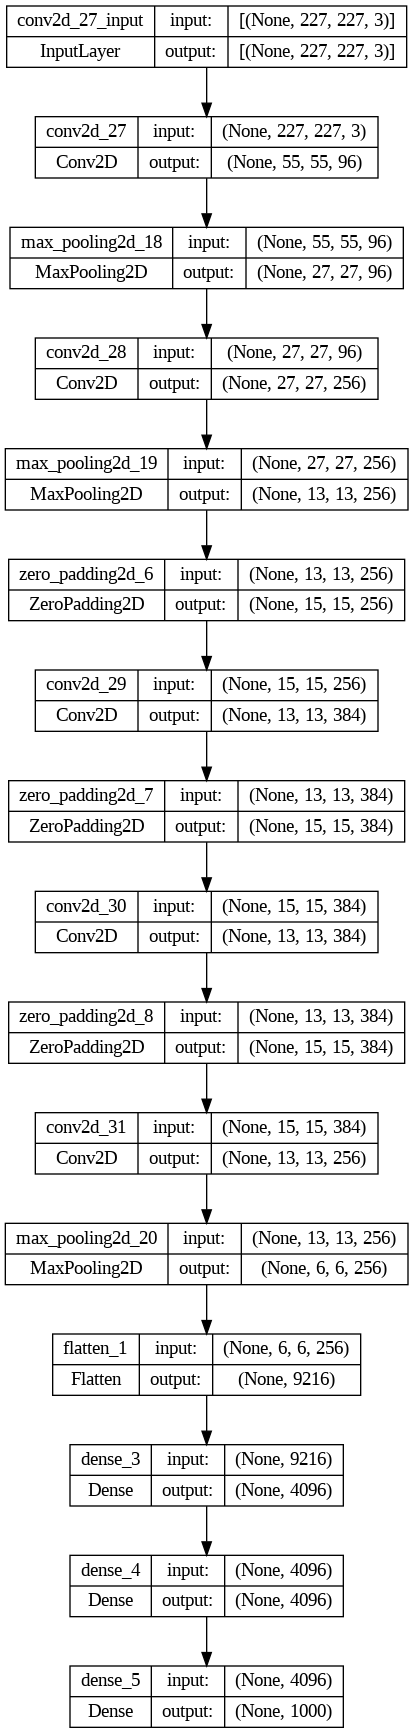

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(alexNet,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
# VGG 
# daha küçük filtreler kullanarak daha derin bir mimari elde etmek
# elde ettikleri mimariyi titanics işlemci üzerinden eğitiyorlar
# derinlikten kastı 16-19 katman arasında değişen modeller
# lokalizasyonda 1.  : nesnenin görüntünün içerisinde yerinin tespit edilmesi
# sınıflandırmada 2. olmuşlar  : nesne görüntünün içerisinde var mı yok mu.
# en meşhurları vgg-16 ve  vgg-19
# 133-135 milyon params
# yine 4096-4096-100lik çıktı.